## Capstone Project NoteBook

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [159]:
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv"

In [160]:
df=pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [161]:
df.shape

(346, 10)

In [162]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [163]:
df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,0
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,1
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,0


In [164]:
df['education'].replace(to_replace=['High School or Below','college','Bechalor','Master or Above'],value=[0,1,2,3],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,0,0
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,2,1
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,1,0
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,1,1
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,1,0


In [165]:
x = df[['Principal','terms','age','education','Gender']]
x[0:5]

,Principal,terms,age,education,Gender
0,1000,30,45,0,0
1,1000,30,33,2,1
2,1000,15,27,1,0
3,1000,30,28,1,1
4,1000,30,29,1,0


In [166]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'],value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,1000,30,9/8/2016,10/7/2016,45,0,0
1,2,2,0,1000,30,9/8/2016,10/7/2016,33,2,1
2,3,3,0,1000,15,9/8/2016,9/22/2016,27,1,0
3,4,4,0,1000,30,9/9/2016,10/8/2016,28,1,1
4,6,6,0,1000,30,9/9/2016,10/8/2016,29,1,0


In [167]:
y=df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

## Train/Test Split

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [169]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


In [170]:
display(X_train.shape, y_train.shape)
display(X_test.shape, y_test.shape)

(276, 5)

(276,)

(70, 5)

(70,)

## Normalize Data

In [171]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[ 0.52,  0.92,  2.33, -1.  , -0.42],
       [ 0.52,  0.92,  0.34,  1.84,  2.38],
       [ 0.52, -0.96, -0.65,  0.42, -0.42],
       [ 0.52,  0.92, -0.49,  0.42,  2.38],
       [ 0.52,  0.92, -0.32,  0.42, -0.42]])

## Classification

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:

K Nearest Neighbor(KNN)
Decision Tree
Support Vector Machine
Logistic Regression
Notice:

You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
You should include the code of the algorithm in the following cells.

## K Nearest Neighbor(KNN)

In [172]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [173]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.56, 0.74, 0.67, 0.74, 0.74, 0.77, 0.73, 0.76, 0.74])

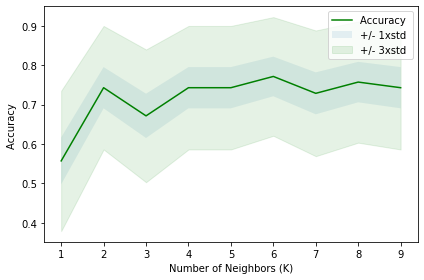

In [174]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [175]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7714285714285715 with k= 6


In [215]:
clf_KNN = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)

## Decision Tree

In [176]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

In [177]:
depths = 10
for n in range(1,depths):
    defaultTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    defaultTree.fit(X_train,y_train)
    predTree = defaultTree.predict(X_test)
    print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree), " for depth of: ",n)

DecisionTrees's Accuracy:  0.7857142857142857  for depth of:  1
DecisionTrees's Accuracy:  0.7857142857142857  for depth of:  2
DecisionTrees's Accuracy:  0.7857142857142857  for depth of:  3
DecisionTrees's Accuracy:  0.7857142857142857  for depth of:  4
DecisionTrees's Accuracy:  0.7857142857142857  for depth of:  5
DecisionTrees's Accuracy:  0.7285714285714285  for depth of:  6
DecisionTrees's Accuracy:  0.7714285714285715  for depth of:  7
DecisionTrees's Accuracy:  0.7714285714285715  for depth of:  8
DecisionTrees's Accuracy:  0.7714285714285715  for depth of:  9


In [178]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
loanTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [179]:
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [180]:
predTree = loanTree.predict(X_test)

In [181]:
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 1 0]
[0 0 0 0 0]


In [182]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7714285714285715


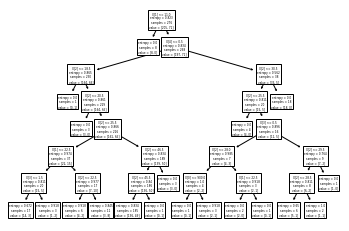

In [183]:
tree.plot_tree(loanTree)
plt.show()

In [218]:
clf_DT = DecisionTreeClassifier(criterion = 'gini').fit(X_train, y_train)

## Support Vector Machine

In [226]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [227]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

In [228]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [229]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [230]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6914285714285714

In [231]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7857142857142857

## Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [191]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [192]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.7 , 0.3 ],
       [0.77, 0.23],
       [0.8 , 0.2 ],
       [0.65, 0.35],
       [0.73, 0.27],
       [0.77, 0.23],
       [0.74, 0.26],
       [0.77, 0.23],
       [0.65, 0.35],
       [0.72, 0.28],
       [0.66, 0.34],
       [0.7 , 0.3 ],
       [0.69, 0.31],
       [0.67, 0.33],
       [0.87, 0.13],
       [0.82, 0.18],
       [0.63, 0.37],
       [0.79, 0.21],
       [0.68, 0.32],
       [0.75, 0.25],
       [0.73, 0.27],
       [0.71, 0.29],
       [0.66, 0.34],
       [0.65, 0.35],
       [0.81, 0.19],
       [0.68, 0.32],
       [0.67, 0.33],
       [0.87, 0.13],
       [0.67, 0.33],
       [0.84, 0.16],
       [0.79, 0.21],
       [0.67, 0.33],
       [0.74, 0.26],
       [0.74, 0.26],
       [0.81, 0.19],
       [0.82, 0.18],
       [0.68, 0.32],
       [0.84, 0.16],
       [0.71, 0.29],
       [0.8 , 0.2 ],
       [0.66, 0.34],
       [0.74, 0.26],
       [0.84, 0.16],
       [0.68, 0.32],
       [0.79, 0.21],
       [0.68, 0.32],
       [0.79, 0.21],
       [0.7 ,

In [193]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7857142857142857

In [194]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 0 15]
 [ 0 55]]


Confusion matrix, without normalization
[[ 0 15]
 [ 0 55]]


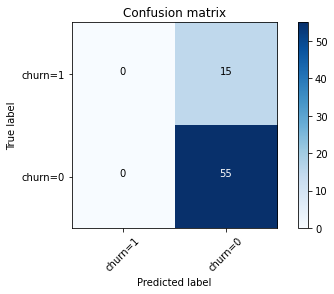

In [195]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')